# Analysis of 2015 SMTO Commute Times

This notebook analizes the 2015 StudentMoveTO Commute Times a bit more in depth. The data used is obtained from the `SMTO_2015_Respondents.csv` file and from `SMTO_2015_Households.csv`. We analize the data in 4 ways:

1.  __Travel Time Distribution per Mode__ (Walking, Public Transit, etc)
2.  __Travel Time vs Distance per Mode__
3.  __Travel Time Distribution per Living Arrangemnt__ (With family, with roommate, etc)
4.  __Travel Time Distribution per Enrollment Status__ (Full-time, Part-time, Other)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_resp = pd.read_csv('../../Data/SMTO_2015/SMTO_2015_Respondents.csv')
df_hh = pd.read_csv('../../Data/SMTO_2015/SMTO_2015_Households.csv')
df = df_resp[['pscmpgendershortname','psage','personstatustime','psmainmodefalltypical','HomeToMainCampusKM','pstraveltimetypfallcommute']].copy()
living_arrangement = df_hh["hhlivingsituation"]
df = df.join(living_arrangement)
df.dropna(inplace = True)

df.head()

,pscmpgendershortname,psage,personstatustime,psmainmodefalltypical,HomeToMainCampusKM,pstraveltimetypfallcommute,hhlivingsituation
0,F,20,FT,Transit Bus,14.00,42.84,Live with family/parents
1,F,25,FT,Walk,0.75,3.41,Live with partner
2,F,23,FT,Transit Bus,29.50,69.76,Live with family/parents
3,M,20,FT,Walk,0.75,17.22,Live with roommates
4,M,27,FT,Walk,0.75,6.59,Live with partner


## 1. Travel Time Distribution per Mode

Let's remember the different types of transportation modes along with the amount of students that use it:

In [2]:
df['psmainmodefalltypical'].value_counts()

Subway/RT                                                     4110
Transit Bus                                                   3067
Walk                                                          2869
GO Train                                                      1168
Bicycle                                                       1032
Car - Driver alone                                             909
GO Bus                                                         816
Streetcar                                                      392
Car - Passenger                                                320
Car - Driver with passenger(s)                                 194
Intercampus Shuttle                                             74
Other                                                           38
I do not travel to the university (distance learners only)      28
Motorcycle, moped or scooter                                    16
Taxi                                                          

What are the maximum/minimum travel times that TTS has recorded?

In [3]:
print('Max: ' + str(df['pstraveltimetypfallcommute'].max()))
print('Min: ' + str(df['pstraveltimetypfallcommute'].min()))

Max: 70.0
Min: 0.0


It looks like SMTO commute times have an upper limit of 70 minutes. However, this does not mean that the longest commute time was 70 minutes. 70 minutes may have been the highest possible commute time that respondents were able to input, so note that s students who claimed to travel this time to school may actaually travel longer than this. There are also students who claimed to travel for 0 minutes. In order to get a better distributed sample, we are going to remove outliers by creating a dataframe that does not contain students with 0 travel time.

In [4]:
df = df[df['pstraveltimetypfallcommute'] != 0.0]

We are now going to look at the distribution of travel times among the different types of transportation modes:

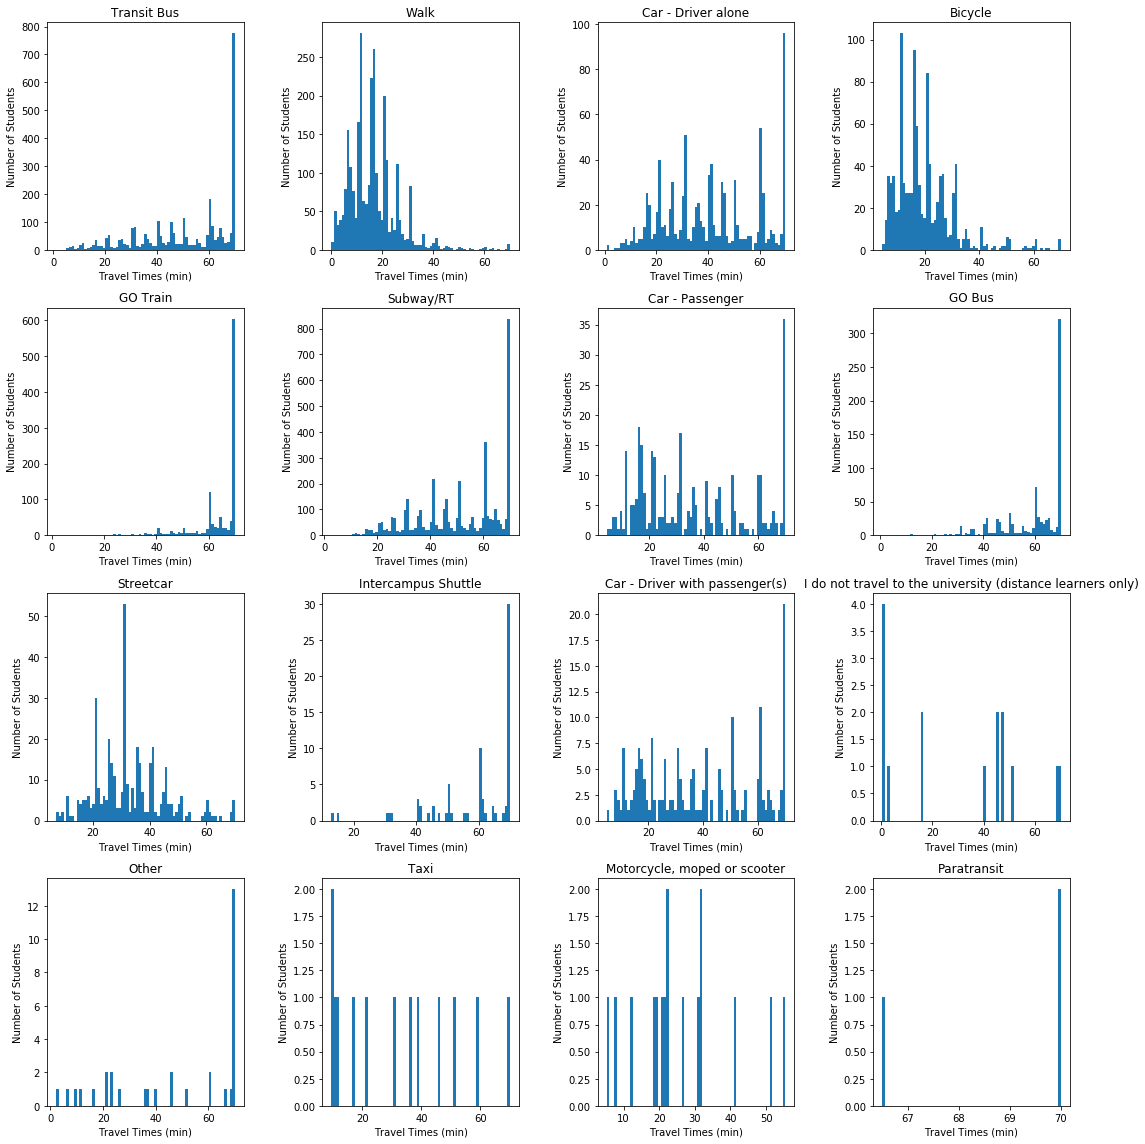

In [5]:
numBins = 69
fig = plt.figure(figsize=(16, 16))
modes = list(df['psmainmodefalltypical'].unique())
idx = 0
for i in modes:
    ax = plt.subplot(4, 4, idx+1)
    temp_df = df[df['psmainmodefalltypical'] == i]
    temp_df['pstraveltimetypfallcommute'].plot.hist(bins=numBins)
    plt.tight_layout()
    plt.xlabel('Travel Times (min)')
    ax.set_ylabel('Number of Students')
    ax.set_title(i)
    #plt.ylim((0, 100))
    #plt.xlim((0, 70))
    idx += 1
plt.show()

As expected, for modes like walking or biking there is a higher distribution of students with lower commute times, while for modes like transit bus, subway, driving, or GO Transit, the commute times are longer. Note that for modes like 'Car - Driver alone' or 'Intercampus Shuttle' there are many students claiming to travel 70 minutes, which means that these students take longer than the max time that SMTO records. 

## 2. Travel Time vs Distance per Mode

Now let's plot time vs distance for each of the modes:

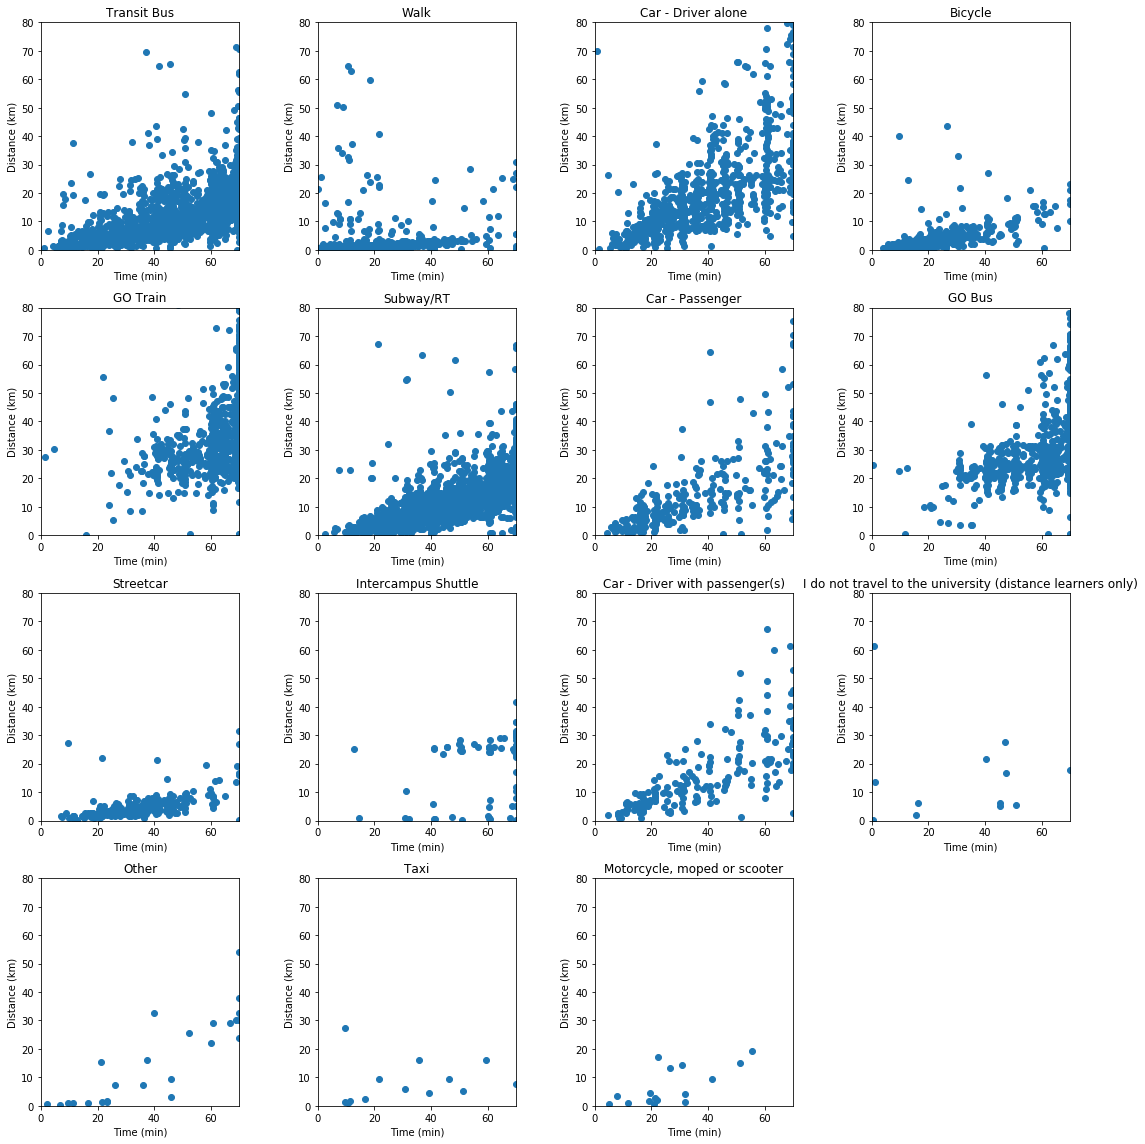

In [6]:
fig = plt.figure(figsize=(16, 16))
modes = list(df['psmainmodefalltypical'].unique()) 
modes.pop(15)
idx = 0
for i in modes:
    temp_df = df[df['psmainmodefalltypical'] == i]
    distance = list(temp_df['HomeToMainCampusKM'])
    time = list(temp_df['pstraveltimetypfallcommute'])
    ax = plt.subplot(4, 4, idx+1)
    plt.tight_layout()
    ax.scatter(time, distance)
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Distance (km)')
    ax.set_title(i)
    plt.ylim((0, 80))
    plt.xlim((0, 70))
    idx += 1
    
plt.show()

Note that by fixing the y-axis to a maximum value of 80km, many outliers were removed from the plots who claimed that their home to school distance was between 200km and 8000km. Still, we can see that there are some values that are clearly wrong, like those who claim to walk around 65km in 10 minutes.

We re also curious to see what the slopes and y-intercepts for each of these graphs are:

In [7]:
print('Mode\t\tSlope\t\t\tY-int')
for i in modes:
    temp_df = df[df['psmainmodefalltypical'] == i]
    distance = list(temp_df['HomeToMainCampusKM'])
    time = list(temp_df['pstraveltimetypfallcommute'])
    x = np.array(time)
    y = np.array(distance)
    m, b = np.polyfit(x, y, 1)
    print(i[:11] + "    \t" + str(m) + "\t" + str(b))

Mode		Slope			Y-int
Transit Bus    	0.3083386239663632	-1.4629217970859885
Walk    	0.044042550469100536	2.237180420655654
Car - Drive    	0.7587269669113084	0.7452455410217517
Bicycle    	0.3174460479466975	-2.7653923882710845
GO Train    	0.6900677114769924	-5.863235929313056
Subway/RT    	0.3159614289150131	-2.4928879770522943
Car - Passe    	0.5124717499331166	-2.6335256499083464
GO Bus    	0.5098046098027509	1.01311571263717
Streetcar    	0.16906248190539397	-1.2573361668608107
Intercampus    	0.2655053986792495	3.778121823403237
Car - Drive    	0.4805553010251046	-2.0757541569758673
I do not tr    	-13.032345517897761	699.7701050901798
Other    	1.4843555739774812	-27.15195450165333
Taxi    	0.05055438350058472	6.742374361578753
Motorcycle,    	0.32290806131270255	-1.5748134623891406


These slopes give us a sense of how fast each travel mode is. For example we can clearly see that walking is a lot slower than driving because the slopes are __0.038__ and __0.707__ respectively, whis is expected. However, it is unexpected to see that the GO Train has a smaller slope than the bicycle. This does not make sense, and it may be due to the unreliable datapoints that show long-distance trips in short periods of time.

Meanwhile, the y intercepts can be interpreted as the degree to which trips with a certain mode are exclusively with that mode. An intercept close to 0 would be expected for modes such as walking and driving, where the travel time is a linear function of the distance. For modes such as transit, however, the travel time might include an amount of time spent walking or driving to a station/stop. Hence, the commute time could be assumed to be a linear function of the distance covered via that mode, plus some additional time before/after this mode.

## 3. Travel Time Distribution per Living Arrangement

Let's remember the different types of living arrangemnts along with the amount of students that identify with them:

In [8]:
df['hhlivingsituation'].value_counts()

Live with family/parents    8268
Live with roommates         3035
Live with partner           1767
Live alone                  1553
Name: hhlivingsituation, dtype: int64

We are now going to look at the distribution of travel times among the different types of loving arrangements:

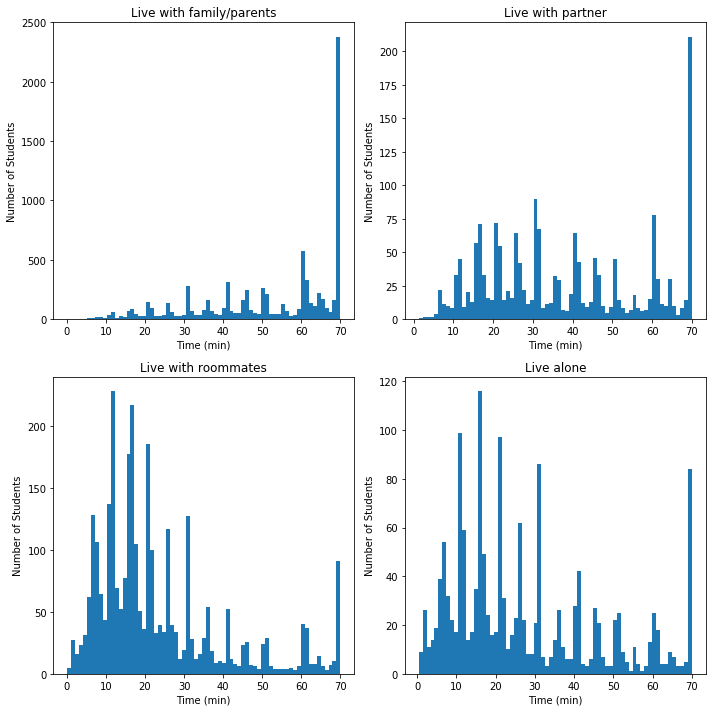

In [9]:
numBins = 69
fig = plt.figure(figsize=(10, 10))
house = list(df['hhlivingsituation'].unique()) 
idx = 0
for i in house:
    ax = plt.subplot(2, 2, idx+1)
    temp_df = df[df['hhlivingsituation'] == i]
    temp_df['pstraveltimetypfallcommute'].plot.hist(bins=numBins)
    plt.tight_layout()
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Number of Students')
    ax.set_title(i)
    #plt.ylim((0, 110))
    idx += 1
plt.show()

As expected, students who live with their families tend to travel for longer perionds of time on average than those who have different forms of living arrangement. 

## 4. Travel Time Distribution per Enrollment Status

Let's remember the different types of enrollment statuses along with the amount of students that identify with them:

In [10]:
df['personstatustime'].value_counts()

FT       13277
PT        1041
Other      305
Name: personstatustime, dtype: int64

We are now going to look at the distribution of travel times among the different types of enrollment status:

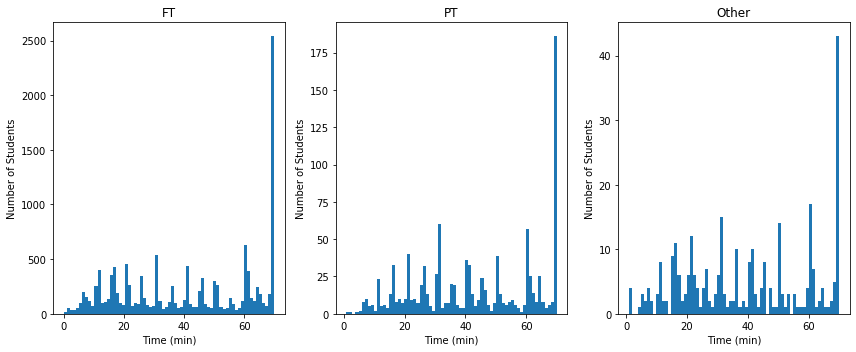

In [11]:
numBins = 69
fig = plt.figure(figsize=(12, 5))
status = list(df['personstatustime'].unique()) 
idx = 0
for i in status:
    ax = plt.subplot(1, 3, idx+1)
    temp_df = df[df['personstatustime'] == i]
    temp_df['pstraveltimetypfallcommute'].plot.hist(bins=numBins)
    plt.tight_layout()
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Number of Students')
    ax.set_title(i)
    #plt.ylim((0, 110))
    idx += 1
plt.show()

These graphs do not seem to give us very useful resutls since there are all very evenly distributed. There are a lot higher numbers in the Full-time histogram because SMTO sampled a lot more Full-time studetns than Part-time or 'Other'.

# Main Conclusion:

The SMTO data gives us relatively realistic resutls in terms of travel times. However, there are still many outliers (eg. those who claim to travel very long walking distances in short amounts of time) that need to be removed in order to make the data cleaner and find better trends. 